# 1. Реализация иерархического классификатора:

# 2. Загрузка датасета:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("data/train_40k.csv")
data

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles
...,...,...,...,...,...,...,...,...,...,...
39995,B0006IYND6,Japonesque Silver Lipstick Palette Kit 1 piece,A1WKFQYYRJ95F6,0/0,3.0,1344211200,Even when it is very convenient I find it real...,beauty,makeup,lips
39996,B000A33FZY,"Truform 20-30 Below Knee Closed-Toe, Beige, Small",A1OMZID10X2JY4,0/0,5.0,1344211200,Wore these the next day after eating Chinese t...,health personal care,medical supplies equipment,braces
39997,B000I7D2L4,Zadro Z300 Wall Mountable Fog Free Mirror,A3I8EYB4CKPQVO,0/0,3.0,1344211200,"this is an OK product. Doesn't really stay ""fo...",beauty,tools accessories,mirrors
39998,B000KHKKB2,Opalescent Glitter Lotion - 6.3 oz - Liquid,A3GTQQ5ZFCFBBL,0/0,4.0,1344211200,"This ""Glitter-Up"" body lotion offers tremendou...",beauty,skin care,body


In [3]:
data_test = pd.read_csv("data/val_10k.csv")
data_test

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1/1,4.0,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,0/0,1.0,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,0/0,5.0,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,0/0,5.0,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1/1,4.0,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys
...,...,...,...,...,...,...,...,...,...,...
9995,B000FGDDI0,Sunbeam 732-500 King Size Heating Pad with Ult...,A3RUBUKF0YX4C7,0/0,4.0,1362182400,Stays on continuously without shutting off! It...,health personal care,health care,pain relievers
9996,B000FVC78C,Reef One Biorb Easy Plants,A1O9H18FJG81FS,0/0,4.0,1362182400,these look great in our 10 gallon tank- colors...,pet supplies,fish aquatic pets,aquarium d cor
9997,B000ICJ8DA,Snoozer Lookout II Pet Car Seat,A3D96MTZP9C1Y,0/0,4.0,1362182400,"This works great, but needs a better way to at...",pet supplies,dogs,carriers travel products
9998,B000Q7AH3W,Omega Paw Tricky Treat Ball,A37L6DBOH234BC,0/0,5.0,1362182400,she absolutely LOVES this thing. I dice up gre...,pet supplies,dogs,toys


# 3. Обучение иерархического классификатора:

### Обучить иерархический классификатор на данных из файла “train_40k.csv”, используя только поле “Text”.

In [4]:
from sklearn.preprocessing import LabelEncoder

X_train = data["Text"]  # Текст отзывов 


encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()

y_cat1 = data["Cat1"]
y_cat2 = data["Cat2"]
y_cat3 = data["Cat3"]

# Преобразуем категориальные признаки в числовые
y_cat1_encode = encoder1.fit_transform(y_cat1)
y_cat2_encode = encoder2.fit_transform(y_cat2)
y_cat3_encode = encoder3.fit_transform(y_cat3)

# Создаем словари для каждого столбца
mapping_cat1 = dict(zip(encoder1.transform(encoder1.classes_), encoder1.classes_))
mapping_cat2 = dict(zip(encoder2.transform(encoder2.classes_), encoder2.classes_))
mapping_cat3 = dict(zip(encoder3.transform(encoder3.classes_), encoder3.classes_))




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...


True

In [13]:
from utils import prepropcess_data, get_embeddings_tfidf, get_embeddings_gzip

preprocces = pd.DataFrame()
preprocces['text'] = X_train
preprocces = prepropcess_data(preprocces)

In [15]:
X_train = preprocces['final_text']
X_train

0        description photo product need change indicate...
1        great book well thought easily imagine event h...
2        first year teacher teach grade special reading...
3        get book bookfair school look something summer...
4        hi martine redman create puzzle briarpatch use...
                               ...                        
39995    even convenient find really small store tiny a...
39996    wore next day eat chinese ankle go inch purcha...
39997    ok product really stay fog free long useful co...
39998    body lotion offer tremendous sparkle absorbs e...
39999    disappointed scent fragrance smell cheap needl...
Name: final_text, Length: 40000, dtype: object

In [16]:
X_test = data_test["Text"]  # Текст отзывов 

test_y_cat1 = data_test["Cat1"]
test_y_cat2 = data_test["Cat2"]
test_y_cat3 = data_test["Cat3"]


In [17]:
from utils import prepropcess_data

preprocces = pd.DataFrame()
preprocces['text'] = X_test
preprocces = prepropcess_data(preprocces)

In [18]:
X_test = preprocces['final_text']
X_test

0       instal week far work great chubby collie old b...
1                  bunny hard time eat hay dry small chew
2       would never million year guess little thing ca...
3       jerky fanatic snackmasters hand best brand mar...
4       wonder quick dog would catch pretty smart play...
                              ...                        
9995    stay continuously without shut however reach m...
9996    look great gallon color fitting child tank bri...
9997    work great need well way attach make ow long s...
9998    absolutely love thing dice green bean carrot w...
9999    hurt neck go rehab exercise use therabands str...
Name: final_text, Length: 10000, dtype: object

In [19]:
mapping_cat1


{0: 'baby products',
 1: 'beauty',
 2: 'grocery gourmet food',
 3: 'health personal care',
 4: 'pet supplies',
 5: 'toys games'}

In [20]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 

class HierarchicalClassifier:
    def __init__(self):
        self.base_classifier_cat1 = LogisticRegression()
        self.base_classifier_cat2 = LogisticRegression()
        self.base_classifier_cat3 = LogisticRegression()


    def fit(self, X_train, y_train_cat1, y_train_cat2, y_train_cat3):
        # Обучите базовые классификаторы для каждой категории
        print(X_train.shape, y_train_cat1.shape, y_train_cat2.shape, y_train_cat3.shape)
        self.clf_cat1 = self.base_classifier_cat1.fit(X_train, y_train_cat1)
        print(2)
        self.clf_cat2 = self.base_classifier_cat2.fit(X_train, y_train_cat2)
        print(3)
        self.clf_cat3 = self.base_classifier_cat3.fit(X_train, y_train_cat3)
        

    def find_closest_category_tfidf(self, predicted_category, possible_categories):
        # Создаем объект TF-IDF для векторного представления категорий
        tfidf_vectorizer = TfidfVectorizer()
        
        # Преобразуем категории в векторы TF-IDF
        category_vectors = tfidf_vectorizer.fit_transform(possible_categories + [predicted_category])
        
        # Получаем вектор предсказанной категории
        predicted_vector = category_vectors[-1]

        # Вычисляем косинусное расстояние между вектором предсказанной категории 
        # и векторами всех возможных категорий

        similarities = cosine_similarity(predicted_vector, category_vectors[:-1])

        # Находим индекс категории с максимальным сходством
        closest_index = similarities.argmax()

        return possible_categories[closest_index]


    def predict(self, X_test):
        pred_cat1 = []
        pred_cat2 = []
        pred_cat3 = []

        
        for i in X_test:
            # print()
            # CAT 1
            # print('='*3 + 'CAT1' + '='*3)
            predicted_cat1 = self.clf_cat1.predict(i)[0]
            # print(predicted_cat1)
            name_cat1 = mapping_cat1[predicted_cat1]
            # print(name_cat1)

            possible_cat2 = data[data["Cat1"] == name_cat1]["Cat2"].unique()
            # print(possible_cat2)

            # CAT 2
            # print('='*3 + 'CAT2' + '='*3)
            predicted_cat2 = self.clf_cat2.predict(i)[0]
            # print(predicted_cat2)
            name_cat2 = mapping_cat2[predicted_cat2]
            # print(name_cat2)

            if name_cat2 not in possible_cat2 and len(possible_cat2) != 0:
                # print('='*4)
                # print('level2 -', name_cat1)
                # print('before:', name_cat2)
                if len(possible_cat2) == 1:
                    name_cat2 = possible_cat2[0]
                else:
                    name_cat2 = self.find_closest_category_tfidf(name_cat2, possible_cat2)
                # print('after', name_cat2)

                


            possible_cat3 = data[data["Cat2"] == name_cat2]["Cat3"].unique()
            # print(possible_cat3)

            # CAT 3
            # print('='*3 + 'CAT3' + '='*3)
            predicted_cat3 = self.clf_cat3.predict(i)[0]
            # print(predicted_cat3)
            name_cat3 = mapping_cat3[predicted_cat3]
            # print(name_cat3)

            if name_cat3 not in possible_cat3 and len(possible_cat3) != 0:
                # print('='*4)
                # print('level3 -', name_cat2)
                # print('before:', name_cat3)
                if len(possible_cat3) == 1:
                    name_cat3 = possible_cat3[0]
                else:
                    name_cat3 = self.find_closest_category_tfidf(name_cat3, possible_cat3)
                # print('after', name_cat3)

            pred_cat1.append(name_cat1)
            pred_cat2.append(name_cat2)
            pred_cat3.append(name_cat3)

        return pred_cat1, pred_cat2, pred_cat3
        

In [22]:
hierarchical_clf = HierarchicalClassifier()
hierarchical_clf.fit(X_train_tfidf, y_cat1_encode, y_cat2_encode, y_cat3_encode)

(40000, 35931) (40000,) (40000,) (40000,)


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred_cat1, y_pred_cat2, y_pred_cat3  = hierarchical_clf.predict(X_test_tfidf)


In [24]:
accuracy = accuracy_score(test_y_cat1, y_pred_cat1)
precision = precision_score(test_y_cat1, y_pred_cat1, average="macro")
recall = recall_score(test_y_cat1, y_pred_cat1, average="macro")
f1 = f1_score(test_y_cat1, y_pred_cat1, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.799
Precision: 0.8049994531115391
Recall: 0.7733349918445708
F1-score: 0.7862419159187771


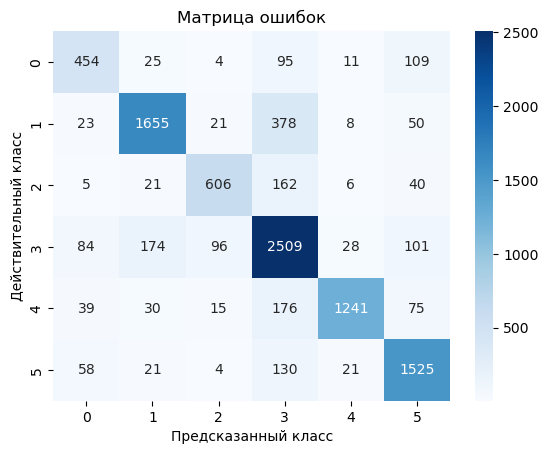

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Создаем матрицу ошибок
cm = confusion_matrix(test_y_cat1, y_pred_cat1)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Настройка осей
plt.xlabel("Предсказанный класс")
plt.ylabel("Действительный класс")
plt.title("Матрица ошибок")

# Отображаем график
plt.show()

In [26]:
accuracy = accuracy_score(test_y_cat2, y_pred_cat2)
precision = precision_score(test_y_cat2, y_pred_cat2, average="macro")
recall = recall_score(test_y_cat2, y_pred_cat2, average="macro")
f1 = f1_score(test_y_cat2, y_pred_cat2, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.5761
Precision: 0.5090269449541609
Recall: 0.3597062766543193
F1-score: 0.38353714986386545


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


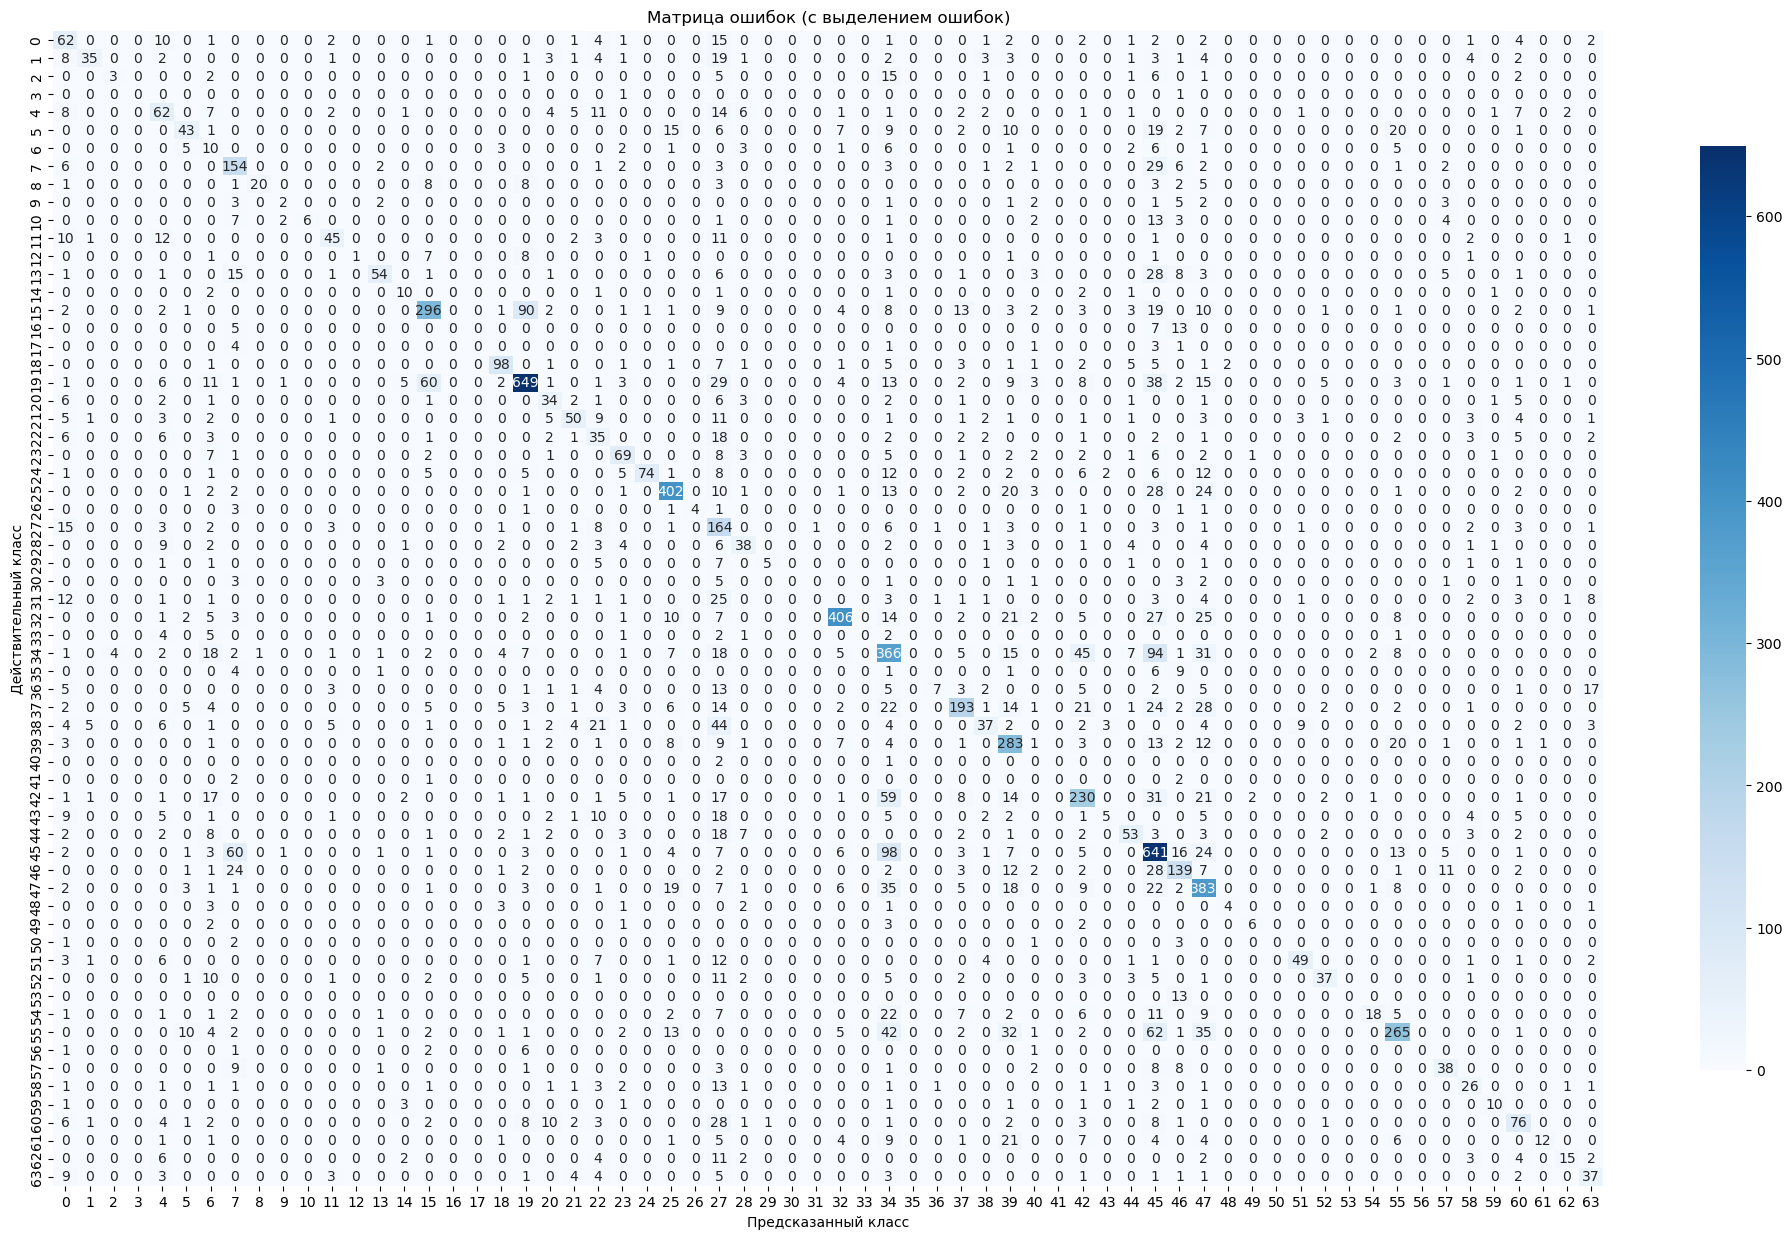

In [27]:
cm = confusion_matrix(test_y_cat2, y_pred_cat2)

plt.figure(figsize=(25, 15))  # Увеличиваем размер графика

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            vmin=0, vmax=np.max(cm), cbar_kws={"shrink": 0.8}) 

plt.xlabel("Предсказанный класс")
plt.ylabel("Действительный класс")
plt.title("Матрица ошибок (с выделением ошибок)")
plt.show()


In [28]:
accuracy = accuracy_score(test_y_cat3, y_pred_cat3)
precision = precision_score(test_y_cat3, y_pred_cat3, average="macro")
recall = recall_score(test_y_cat3, y_pred_cat3, average="macro")
f1 = f1_score(test_y_cat3, y_pred_cat3, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.4215
Precision: 0.23327317039303475
Recall: 0.13901140146840688
F1-score: 0.15322194000323375


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
Accuracy: 0.7979
Precision: 0.8073738764327585
Recall: 0.7685158841174959
F1-score: 0.7841901978595267

Accuracy: 0.5651
Precision: 0.48230757503966437
Recall: 0.335027991432518
F1-score: 0.3550841763811084

Accuracy: 0.4018
Precision: 0.21494358184490048
Recall: 0.11784554620806816
F1-score: 0.13153626019239117

In [ ]:
Accuracy: 0.799
Precision: 0.8049994531115391
Recall: 0.7733349918445708
F1-score: 0.7862419159187771

Accuracy: 0.5761
Precision: 0.5090269449541609
Recall: 0.3597062766543193
F1-score: 0.38353714986386545

Accuracy: 0.4215
Precision: 0.23327317039303475
Recall: 0.13901140146840688
F1-score: 0.15322194000323375